In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
base_dir = '../data/chest_xray/'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32


Classes found: ['NORMAL', 'PNEUMONIA']

--- Training Set ---
Normal images: 1341
Pneumonia images: 3875
Total training images: 5216


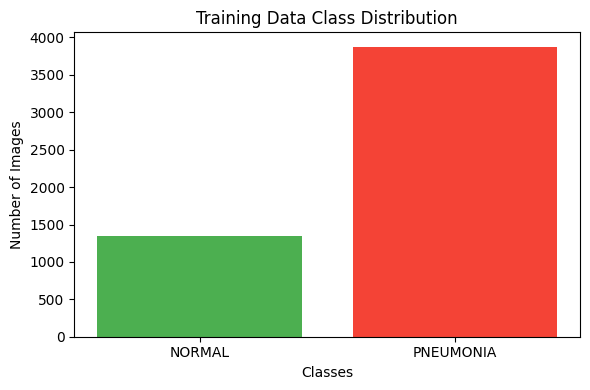

In [ ]:
class_names = sorted(
    [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
)
print(f"Classes found: {class_names}")

normal_count = len([
    f for f in os.listdir(os.path.join(train_dir, 'NORMAL'))
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])

pneumonia_count = len([
    f for f in os.listdir(os.path.join(train_dir, 'PNEUMONIA'))
    if f.lower().endswith(('.png', '.jpg', '.jpeg'))
])

total_train = normal_count + pneumonia_count

print(f"\n--- Training Set ---")
print(f"Normal images: {normal_count}")
print(f"Pneumonia images: {pneumonia_count}")
print(f"Total training images: {total_train}")

plt.figure(figsize=(6, 4))
plt.bar(class_names, [normal_count, pneumonia_count],
        color=['#4CAF50', '#F44336'])
plt.title('Training Data Class Distribution')
plt.ylabel('Number of Images')
plt.xlabel('Classes')
plt.tight_layout()
plt.show()

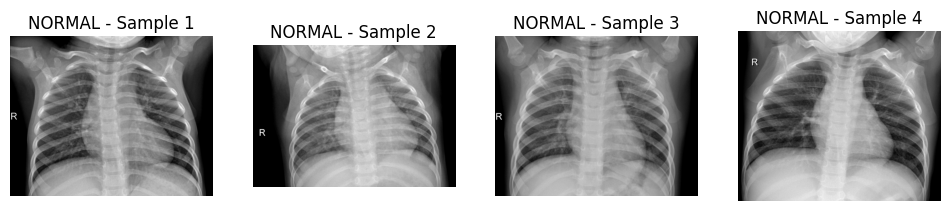

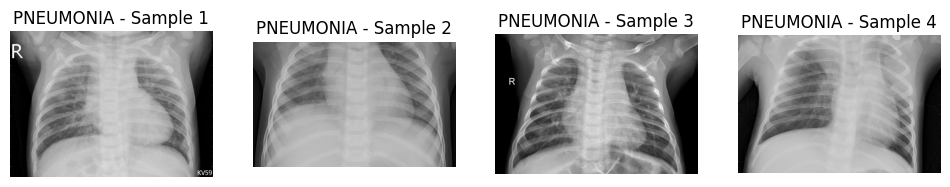

In [ ]:
def show_random_images(class_name, num_images=4):
    folder = os.path.join(train_dir, class_name)
    image_files = np.random.choice(os.listdir(folder), num_images, replace=False)
    
    plt.figure(figsize=(12, 3))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder, img_file)
        img = plt.imread(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{class_name} - Sample {i+1}")
        plt.axis('off')
    plt.show()

show_random_images('NORMAL')
show_random_images('PNEUMONIA')


In [ ]:
print("Loading data using TensorFlow's image_dataset_from_directory...")

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',     
    label_mode='binary',    
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True            
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False          
)

print("\nDatasets created successfully!")

for images, labels in train_dataset.take(1):
    print(f"\n--- Inspecting one batch ---")
    print(f"Shape of image batch: {images.shape}")
    print(f"Shape of label batch: {labels.shape}")
    print(f"Data type of images: {images.dtype}")
    print(f"Sample labels: {labels.numpy()[:5]}") 


Loading data using TensorFlow's image_dataset_from_directory...
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.

Datasets created successfully!

--- Inspecting one batch ---
Shape of image batch: (32, 224, 224, 3)
Shape of label batch: (32, 1)
Data type of images: <dtype: 'float32'>
Sample labels: [[1.]
 [0.]
 [1.]
 [1.]
 [1.]]


2025-10-06 18:54:46.071849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
